# Download and Explore Data

In [1]:
pip install geopy

     |████████████████████████████████| 102kB 18.8MB/s ta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/99/45/d1/14954797e2a976083182c2e7da9b4e924509e59b6e5c661061
Successfully built geographiclib
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## 1.1 NYC Location Data

In [3]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [4]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [5]:
neighborhoods_data = newyork_data['features']

In [6]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [7]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

neighborhoods = pd.DataFrame(columns=column_names)

In [8]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [9]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [10]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [11]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


In [12]:
map_brooklyn = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(brooklyn_data['Latitude'], brooklyn_data['Longitude'], brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn)  
    
map_brooklyn

In [13]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


In [14]:
address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


## 1.2 NYC Foursquare Data

In [15]:
CLIENT_ID = 'PJGYFDU5OUJBSBKDHZVCPML5GE350OR2L3KAEZ1NJ0ICPABB' 
CLIENT_SECRET = 'ZQUANAZOZ4JTUQPZFE2UWCD1ZR4NTZBNZVOLQOXUT0235LTI'
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PJGYFDU5OUJBSBKDHZVCPML5GE350OR2L3KAEZ1NJ0ICPABB
CLIENT_SECRET:ZQUANAZOZ4JTUQPZFE2UWCD1ZR4NTZBNZVOLQOXUT0235LTI


In [16]:
neighborhood_latitude = brooklyn_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = brooklyn_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = brooklyn_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bay Ridge are 40.625801065010656, -74.03062069353813.


In [17]:
# type your answer here
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=PJGYFDU5OUJBSBKDHZVCPML5GE350OR2L3KAEZ1NJ0ICPABB&client_secret=ZQUANAZOZ4JTUQPZFE2UWCD1ZR4NTZBNZVOLQOXUT0235LTI&v=20180605&ll=40.625801065010656,-74.03062069353813&radius=500&limit=100'

In [18]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d5aedd0342adf0038f8745f'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bay Ridge',
  'headerFullLocation': 'Bay Ridge, Brooklyn',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 88,
  'suggestedBounds': {'ne': {'lat': 40.63030106951066,
    'lng': -74.02470273356597},
   'sw': {'lat': 40.62130106051065, 'lng': -74.03653865351028}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b895827f964a5206c2d32e3',
       'name': 'Pilo Arts Day Spa and Salon',
       'location': {'address': '8412 3rd Ave',
        'lat': 40.62474788273414,
        'lng': -74.03059056940135,
        'labeledLatL

In [19]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [20]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Pilo Arts Day Spa and Salon,Spa,40.624748,-74.030591
1,Bagel Boy,Bagel Shop,40.627896,-74.029335
2,Cocoa Grinder,Juice Bar,40.623967,-74.030863
3,Pegasus Cafe,Breakfast Spot,40.623168,-74.031186
4,Ho' Brah Taco Joint,Taco Place,40.622960,-74.031371


In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            

        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
       
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
brooklyn_venues = getNearbyVenues(names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude']
                                  )

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [23]:
print(brooklyn_venues.shape)
brooklyn_venues.head()

(2829, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
1,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
2,Bay Ridge,40.625801,-74.030621,Cocoa Grinder,40.623967,-74.030863,Juice Bar
3,Bay Ridge,40.625801,-74.030621,Pegasus Cafe,40.623168,-74.031186,Breakfast Spot
4,Bay Ridge,40.625801,-74.030621,Ho' Brah Taco Joint,40.622960,-74.031371,Taco Place


In [24]:
brooklyn_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bath Beach,51,51,51,51,51,51
Bay Ridge,88,88,88,88,88,88
Bedford Stuyvesant,25,25,25,25,25,25
Bensonhurst,34,34,34,34,34,34
Bergen Beach,7,7,7,7,7,7
Boerum Hill,86,86,86,86,86,86
Borough Park,20,20,20,20,20,20
Brighton Beach,43,43,43,43,43,43
Broadway Junction,14,14,14,14,14,14


In [25]:
print('There are {} uniques categories.'.format(len(brooklyn_venues['Venue Category'].unique())))

There are 285 uniques categories.


In [26]:
# one hot encoding
brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brooklyn_onehot['Neighborhood'] = brooklyn_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]

brooklyn_onehot.head()

,Yoga Studio,Adult Boutique,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Hockey Field,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roller Rink,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Trail,Turkish Restaurant,Used Bookstore,Vape Store,Varenyky restaurant,Vegetarian / Vegan Rest

In [27]:
brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
brooklyn_grouped

,Neighborhood,Yoga Studio,Adult Boutique,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Hockey Field,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roller Rink,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Trail,Turkish Restaurant,Used Bookstore,Vape Store,Varenyky restaurant,Vegetarian / Vegan Rest

In [28]:
num_top_venues = 2

for hood in brooklyn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = brooklyn_grouped[brooklyn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bath Beach----
                venue  freq
0         Pizza Place  0.06
1  Chinese Restaurant  0.06


----Bay Ridge----
                venue  freq
0  Italian Restaurant  0.08
1                 Spa  0.08


----Bedford Stuyvesant----
         venue  freq
0         Café  0.08
1  Pizza Place  0.08


----Bensonhurst----
              venue  freq
0       Pizza Place  0.12
1  Sushi Restaurant  0.06


----Bergen Beach----
             venue  freq
0  Harbor / Marina  0.29
1       Playground  0.14


----Boerum Hill----
          venue  freq
0   Coffee Shop  0.05
1  Dance Studio  0.05


----Borough Park----
         venue  freq
0         Bank  0.20
1  Pizza Place  0.15


----Brighton Beach----
        venue  freq
0       Beach  0.07
1  Restaurant  0.07


----Broadway Junction----
        venue  freq
0       Diner  0.14
1  Donut Shop  0.14


----Brooklyn Heights----
           venue  freq
0    Yoga Studio  0.05
1  Deli / Bodega  0.04


----Brownsville----
        venue  freq
0  Restaurant  0.1

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath Beach,Pizza Place,Pharmacy,Chinese Restaurant,Kids Store,Bubble Tea Shop,Sushi Restaurant,Fast Food Restaurant,Italian Restaurant,Donut Shop,Deli / Bodega
1,Bay Ridge,Spa,Italian Restaurant,Pizza Place,Bar,Greek Restaurant,American Restaurant,Bagel Shop,Hookah Bar,Seafood Restaurant,Sandwich Place
2,Bedford Stuyvesant,Bar,Café,Pizza Place,Coffee Shop,Japanese Restaurant,Bus Stop,Boutique,New American Restaurant,Cocktail Bar,Gourmet Shop
3,Bensonhurst,Pizza Place,Ice Cream Shop,Donut Shop,Bakery,Sushi Restaurant,Chinese Restaurant,Cosmetics Shop,Coffee Shop,Noodle House,Playground
4,Bergen Beach,Harbor / Marina,Baseball Field,Athletics & Sports,Playground,Hockey Field,Donut Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant


### *User Data will be created at the end

## 2 Data Analysis and Clustering

In [31]:
kclusters = 5

brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brooklyn_grouped_clustering)

kmeans.labels_[0:10] 

array([2, 0, 0, 2, 0, 0, 2, 0, 4, 0], dtype=int32)

In [32]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

brooklyn_merged = brooklyn_data

brooklyn_merged = brooklyn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

brooklyn_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,0,Spa,Italian Restaurant,Pizza Place,Bar,Greek Restaurant,American Restaurant,Bagel Shop,Hookah Bar,Seafood Restaurant,Sandwich Place
1,Brooklyn,Bensonhurst,40.611009,-73.995180,2,Pizza Place,Ice Cream Shop,Donut Shop,Bakery,Sushi Restaurant,Chinese Restaurant,Cosmetics Shop,Coffee Shop,Noodle House,Playground
2,Brooklyn,Sunset Park,40.645103,-74.010316,2,Bakery,Bank,Pizza Place,Mexican Restaurant,Latin American Restaurant,Gym,Pharmacy,Mobile Phone Shop,Italian Restaurant,Record Shop
3,Brooklyn,Greenpoint,40.730201,-73.954241,0,Bar,Cocktail Bar,Coffee Shop,Pizza Place,Yoga Studio,French Restaurant,Record Shop,Mexican Restaurant,Boutique,Café
4,Brooklyn,Gravesend,40.595260,-73.973471,2,Pizza Place,Italian Restaurant,Bakery,Lounge,Martial Arts Dojo,Metro Station,Chinese Restaurant,Deli / Bodega,Spa,Bus Station


In [33]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(brooklyn_merged['Latitude'], brooklyn_merged['Longitude'], brooklyn_merged['Neighborhood'], brooklyn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 2.1 Cluster Review

Cluster 1

In [34]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 0, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Ridge,Spa,Italian Restaurant,Pizza Place,Bar,Greek Restaurant,American Restaurant,Bagel Shop,Hookah Bar,Seafood Restaurant,Sandwich Place
3,Greenpoint,Bar,Cocktail Bar,Coffee Shop,Pizza Place,Yoga Studio,French Restaurant,Record Shop,Mexican Restaurant,Boutique,Café
5,Brighton Beach,Russian Restaurant,Beach,Restaurant,Mobile Phone Shop,Eastern European Restaurant,Gourmet Shop,Sushi Restaurant,Bank,Fast Food Restaurant,Supermarket
6,Sheepshead Bay,Dessert Shop,Turkish Restaurant,Sandwich Place,Italian Restaurant,Yoga Studio,Miscellaneous Shop,Buffet,Café,Russian Restaurant,Karaoke Bar
11,Kensington,Grocery Store,Thai Restaurant,Sandwich Place,Ice Cream Shop,Restaurant,Pizza Place,Pharmacy,Outdoors & Recreation,Café,Racetrack
12,Windsor Terrace,Diner,Café,Deli / Bodega,Park,Plaza,Bagel Shop,Butcher,Salad Place,Bookstore,Chinese Restaurant
13,Prospect Heights,Bar,Mexican Restaurant,Ice Cream Shop,Thai Restaurant,Wine Shop,Bakery,Cocktail Bar,Gourmet Shop,American Restaurant,Beer Bar
14,Brownsville,Restaurant,Park,Moving Target,Performing Arts Venue,Fast Food Restaurant,Trail,Convenience Store,Spanish Restaurant,Caribbean Restaurant,Pool
15,Williamsburg,Bar,Pizza Place,Coffee Shop,Bagel Shop,Pet Store,Korean Restaurant,Taco Place,Latin American Restaurant,Steakhouse,Liquor Store
16,Bushwick,Bar,Deli / Bodega,Coffee Shop,Mexican Restaurant,Pizza Place,Thrift / Vintage Store,Discount Store,Bakery,New American Restaurant,Café


Cluster 2

In [35]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 1, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
59,Paerdegat Basin,Gym,Asian Restaurant,Moving Target,Food,Chinese Restaurant,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant


Cluster 3

In [36]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 2, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bensonhurst,Pizza Place,Ice Cream Shop,Donut Shop,Bakery,Sushi Restaurant,Chinese Restaurant,Cosmetics Shop,Coffee Shop,Noodle House,Playground
2,Sunset Park,Bakery,Bank,Pizza Place,Mexican Restaurant,Latin American Restaurant,Gym,Pharmacy,Mobile Phone Shop,Italian Restaurant,Record Shop
4,Gravesend,Pizza Place,Italian Restaurant,Bakery,Lounge,Martial Arts Dojo,Metro Station,Chinese Restaurant,Deli / Bodega,Spa,Bus Station
7,Manhattan Terrace,Pizza Place,Ice Cream Shop,Donut Shop,Cosmetics Shop,Burger Joint,Grocery Store,Coffee Shop,Bank,Bagel Shop,Steakhouse
9,Crown Heights,Pizza Place,Café,Museum,Candy Store,Coffee Shop,Bakery,Bagel Shop,Supermarket,Bookstore,Burger Joint
25,Cypress Hills,Pizza Place,Latin American Restaurant,Fried Chicken Joint,Ice Cream Shop,Spanish Restaurant,Fast Food Restaurant,Donut Shop,Liquor Store,Baseball Field,Chinese Restaurant
33,Bath Beach,Pizza Place,Pharmacy,Chinese Restaurant,Kids Store,Bubble Tea Shop,Sushi Restaurant,Fast Food Restaurant,Italian Restaurant,Donut Shop,Deli / Bodega
34,Borough Park,Bank,Pizza Place,Pharmacy,Fast Food Restaurant,Deli / Bodega,Restaurant,Coffee Shop,Electronics Store,Café,Bike Shop
37,Marine Park,Ice Cream Shop,Athletics & Sports,Pizza Place,Soccer Field,Basketball Court,Baseball Field,Gym,Deli / Bodega,Herbs & Spices Store,Event Service
44,City Line,Donut Shop,Liquor Store,Pizza Place,Mobile Phone Shop,Shoe Store,Clothing Store,Bus Stop,Spanish Restaurant,Mexican Restaurant,South American Restaurant


Cluster 4

In [37]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 3, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Mill Island,Pool,Lake,Food,Filipino Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop


Cluster 5

In [38]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 4, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Flatbush,Deli / Bodega,Caribbean Restaurant,Coffee Shop,Mexican Restaurant,Pizza Place,Bagel Shop,Gastropub,Chinese Restaurant,Massage Studio,Sandwich Place
10,East Flatbush,Department Store,Hardware Store,Deli / Bodega,Moving Target,Supermarket,Fast Food Restaurant,Caribbean Restaurant,Park,Chinese Restaurant,Food & Drink Shop
26,East New York,Fast Food Restaurant,Deli / Bodega,Gym,Food,Music Venue,Metro Station,Liquor Store,Caribbean Restaurant,Event Service,Chinese Restaurant
27,Starrett City,Women's Store,Liquor Store,Pharmacy,Donut Shop,Caribbean Restaurant,Shopping Mall,Moving Target,Supermarket,Pizza Place,Intersection
28,Canarsie,Grocery Store,Chinese Restaurant,Gym,Thai Restaurant,Caribbean Restaurant,Asian Restaurant,Factory,Falafel Restaurant,Farm,Farmers Market
29,Flatlands,Pharmacy,Deli / Bodega,Fried Chicken Joint,Fast Food Restaurant,Caribbean Restaurant,Park,Nightclub,Lounge,Sandwich Place,Bar
32,Coney Island,Caribbean Restaurant,Baseball Stadium,Deli / Bodega,Gourmet Shop,Brewery,Skating Rink,Music Venue,Beach,Food Court,Theme Park Ride / Attraction
47,Prospect Park South,Pharmacy,Caribbean Restaurant,Pizza Place,Mobile Phone Shop,Grocery Store,Fast Food Restaurant,Fried Chicken Joint,Kids Store,Latin American Restaurant,Donut Shop
54,Ditmas Park,Pizza Place,Discount Store,Kids Store,Pharmacy,Caribbean Restaurant,Chinese Restaurant,Donut Shop,Convenience Store,Deli / Bodega,Department Store
55,Wingate,Fast Food Restaurant,Playground,BBQ Joint,Fish & Chips Shop,Field,Fried Chicken Joint,Farmers Market,Nightclub,Liquor Store,Rental Car Location


## 2.2 User Profile Data

In [92]:
userInput = [
            {'Venue':'Bar', 'importance rating':1},
            {'Venue':'Park', 'importance rating':2},
            {'Venue':'Gym', 'importance rating':3},
            {'Venue':'Supermarket', 'importance rating':4},
         ] 
userProfile = pd.DataFrame(userInput)
userProfile

,Venue,importance rating
0,Bar,1
1,Park,2
2,Gym,3
3,Supermarket,4


In [44]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Top 10 Bars 

In [49]:
df_bar = brooklyn_grouped[['Neighborhood','Bar']]
df_bar.head()

,Neighborhood,Bar
0,Bath Beach,0.000000
1,Bay Ridge,0.034091
2,Bedford Stuyvesant,0.080000
3,Bensonhurst,0.000000
4,Bergen Beach,0.000000


In [90]:
df_bar_sorted = df_bar.sort_values('Bar', ascending=False).head(10)
df_bar_sorted.head()

,Neighborhood,Bar
11,Bushwick,0.094595
34,Gerritsen Beach,0.090909
37,Greenpoint,0.080000
2,Bedford Stuyvesant,0.080000
54,Prospect Heights,0.074074


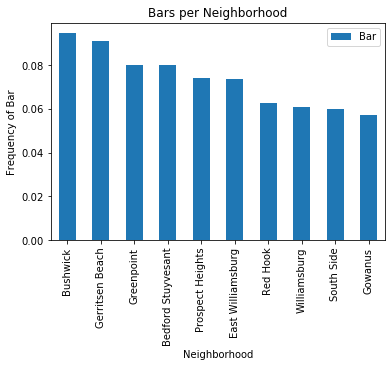

In [91]:
df_bar_sorted.plot(kind='bar', x='Neighborhood', y='Bar')

plt.title('Bars per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Frequency of Bar')

plt.show()

## Top 10 Park

In [85]:
df_park = brooklyn_grouped[['Neighborhood','Park']]

df_park_sorted = df_park.sort_values('Park', ascending=False).head(10)
df_park_sorted.head()


,Neighborhood,Park
32,Fulton Ferry,0.135593
10,Brownsville,0.100000
24,East Flatbush,0.083333
68,Windsor Terrace,0.074074
66,Weeksville,0.071429


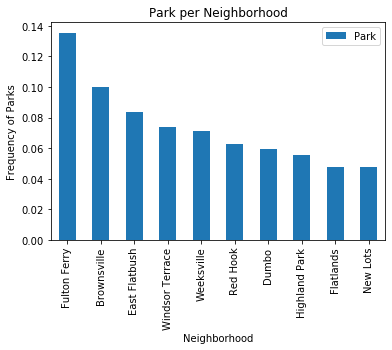

In [87]:
df_park_sorted.plot(kind='bar', x='Neighborhood', y='Park')

plt.title('Park per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Frequency of Parks')

plt.show()

## Top 10 Gym

In [88]:
df_gym = brooklyn_grouped[['Neighborhood','Gym']]

df_gym_sorted = df_gym.sort_values('Gym', ascending=False).head(10)
df_gym_sorted.head()

,Neighborhood,Gym
52,Paerdegat Basin,0.200000
12,Canarsie,0.166667
44,Marine Park,0.125000
25,East New York,0.066667
64,Sunset Park,0.060606


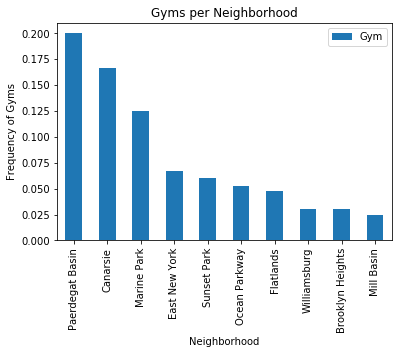

In [89]:
df_gym_sorted.plot(kind='bar', x='Neighborhood', y='Gym')

plt.title('Gyms per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Frequency of Gyms')

plt.show()

## Top 10 Super Market

In [93]:
df_supermarket = brooklyn_grouped[['Neighborhood','Supermarket']]

df_supermarket_sorted = df_supermarket.sort_values('Supermarket', ascending=False).head(10)
df_supermarket_sorted.head()

,Neighborhood,Supermarket
59,Rugby,0.117647
63,Starrett City,0.090909
24,East Flatbush,0.083333
58,Remsen Village,0.062500
38,Highland Park,0.055556


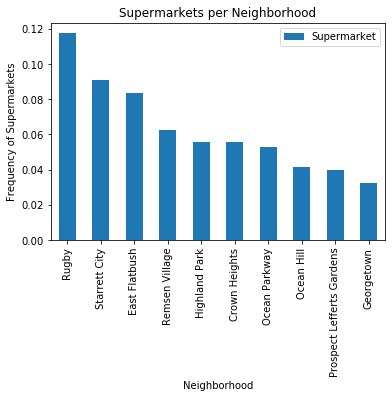

In [94]:
df_supermarket_sorted.plot(kind='bar', x='Neighborhood', y='Supermarket')

plt.title('Supermarkets per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Frequency of Supermarkets')

plt.show()

In [103]:
df_venues = brooklyn_grouped[['Neighborhood','Bar', 'Park', 'Gym','Supermarket']]
df_venues.head(10)

,Neighborhood,Bar,Park,Gym,Supermarket
0,Bath Beach,0.000000,0.019608,0.00,0.000000
1,Bay Ridge,0.034091,0.011364,0.00,0.011364
2,Bedford Stuyvesant,0.080000,0.040000,0.00,0.000000
3,Bensonhurst,0.000000,0.000000,0.00,0.029412
4,Bergen Beach,0.000000,0.000000,0.00,0.000000
5,Boerum Hill,0.034884,0.000000,0.00,0.000000
6,Borough Park,0.000000,0.000000,0.00,0.000000
7,Brighton Beach,0.000000,0.000000,0.00,0.023256
8,Broadway Junction,0.000000,0.000000,0.00,0.000000
9,Brooklyn Heights,0.020000,0.040000,0.03,0.010000


In [117]:
df_venues_sorted = df_venues.sort_values(by=['Bar', 'Park','Gym','Supermarket'], ascending=[False,False, False, False])
df_venues_sorted.head(3)

,Neighborhood,Bar,Park,Gym,Supermarket
11,Bushwick,0.094595,0.00,0.013514,0.0
34,Gerritsen Beach,0.090909,0.00,0.000000,0.0
2,Bedford Stuyvesant,0.080000,0.04,0.000000,0.0


# Based on the user's priority list the top 3 locations are:

## 1. Bushwick
## 2. Gerritsen Beach
## 3. Bedford-Stuyvesant